In [1]:
from __future__ import absolute_import, division, print_function
import numpy as np
import pandas as pd
import keras
from keras.datasets import cifar10, mnist
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Reshape
from keras.layers import Convolution2D, MaxPooling2D, BatchNormalization
from keras.utils import np_utils
import pickle
from matplotlib import pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (15, 8)

Using TensorFlow backend.


In [2]:
from google.colab import drive
drive.mount('/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /drive


**Read the images and generate the train and test dataset**

In [0]:
from glob import glob
import cv2

Reading train images from the Drive and collecting images and their labels in the variable.


In [0]:
path_to_images = '/drive/My Drive/AIML/CNN/project/plant-seedlings-classification/train/*/*.png'
images = []
labels = []
scale = 100
for i in glob(path_to_images):
    images.append(cv2.resize(cv2.imread(i),(scale,scale)))
    labels.append(i.split('/')[-2])

Reading test images for testing.

In [0]:
path_to_test_images = '/drive/My Drive/AIML/CNN/project/plant-seedlings-classification/test/*.png'
test_images = []
scale = 100
for i in glob(path_to_test_images):
    test_images.append(cv2.resize(cv2.imread(i),(scale,scale)))

Different types of plant species

In [6]:
np.unique(labels)

array(['Black-grass', 'Charlock', 'Cleavers', 'Common Chickweed',
       'Common wheat', 'Fat Hen', 'Loose Silky-bent', 'Maize',
       'Scentless Mayweed', 'Shepherds Purse',
       'Small-flowered Cranesbill', 'Sugar beet'], dtype='<U25')

We are encoding categorical labels into numbers

In [0]:
from sklearn.preprocessing import LabelEncoder

In [0]:
label_encoder = LabelEncoder()

In [9]:
label_encoder.fit(labels)

LabelEncoder()

In [0]:
labels = label_encoder.transform(labels)

In [11]:
np.unique(labels)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In above steps, we have encoded categorical labels into numbers and we have total 12 different plant species.

In [0]:
labels = np_utils.to_categorical(labels) #we are converting each numerical label into binary class matrix.

In [13]:
labels.shape

(4750, 12)

In [0]:
images = np.asarray(images)

In [15]:
images.shape

(4750, 100, 100, 3)

In [16]:
labels.shape

(4750, 12)

Testing images for testing purposes.

In [0]:
testing_images = np.asarray(test_images)

In [18]:
print("Testing images shape : ", testing_images.shape)

Testing images shape :  (794, 100, 100, 3)


**Divide the data set into Train and validation data sets**

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train, X_test, Y_train, Y_test = train_test_split(images/255, labels, test_size=0.3, random_state=42) 
#train test split and we are also normalizing pixels value in the range 0 to 1

In [21]:
X_train[3]

array([[[0.18431373, 0.2745098 , 0.35294118],
        [0.19215686, 0.28627451, 0.35686275],
        [0.16862745, 0.2627451 , 0.34117647],
        ...,
        [0.22745098, 0.27843137, 0.3372549 ],
        [0.24705882, 0.30196078, 0.34901961],
        [0.22352941, 0.27843137, 0.34117647]],

       [[0.17647059, 0.26666667, 0.34117647],
        [0.18823529, 0.27843137, 0.34901961],
        [0.16078431, 0.25882353, 0.33333333],
        ...,
        [0.2627451 , 0.32156863, 0.37647059],
        [0.25098039, 0.31372549, 0.37254902],
        [0.25098039, 0.30980392, 0.37254902]],

       [[0.16470588, 0.25490196, 0.32941176],
        [0.16862745, 0.25882353, 0.33333333],
        [0.16470588, 0.2627451 , 0.33333333],
        ...,
        [0.2627451 , 0.32156863, 0.38431373],
        [0.25098039, 0.31372549, 0.38039216],
        [0.27058824, 0.33333333, 0.4       ]],

       ...,

       [[0.16862745, 0.25098039, 0.31764706],
        [0.17647059, 0.25882353, 0.32941176],
        [0.19607843, 0

In [22]:
print("Training data shape: ", X_train.shape)

Training data shape:  (3325, 100, 100, 3)


In [23]:
print("Validation data shape: ", X_test.shape)

Validation data shape:  (1425, 100, 100, 3)


In [0]:
import skimage.io as io
import matplotlib.pyplot as plt

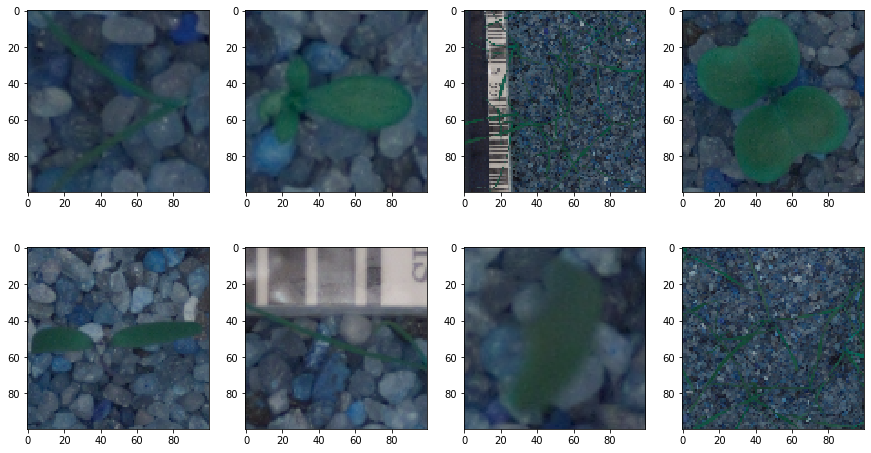

In [25]:
for i in range(8):
    plt.subplot(2,4,i+1)
    plt.imshow(X_train[i])

**Initialize & build the model**

In [0]:
from keras.preprocessing.image import ImageDataGenerator

In [0]:
#we are doing data augmentation by rotating, Flipping and shifting images so that our model will be able to predict right if images are shifted or rotated etc.
datagen = ImageDataGenerator(
    featurewise_center=False,  
    samplewise_center=False, 
    featurewise_std_normalization=False,  
    samplewise_std_normalization=False,  
    zca_whitening=False,  
    rotation_range=50,  
    width_shift_range=0.02,  
    height_shift_range=0.02,  
    horizontal_flip=True, 
    vertical_flip=True)

In [0]:
datagen.fit(X_train)

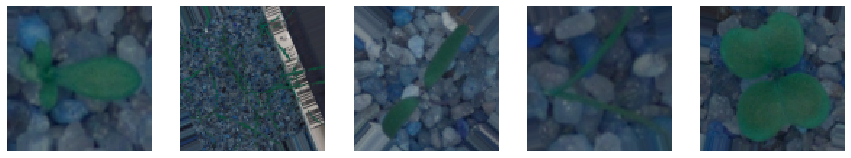

In [62]:
gen = datagen.flow(X_train[:5], batch_size=1)
for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.axis("off")
    plt.imshow(gen.next().squeeze())
    plt.plot()

In [30]:
model = Sequential()

#Adding convolution layer
model.add(Convolution2D(16, 3, 3, input_shape=(100, 100, 3)))
model.add(Activation('relu'))

#Pooling
model.add(MaxPooling2D(2,2))

#Adding one more convolution layer
model.add(Convolution2D(16, 3,3))
model.add(Activation('relu'))

#Pooling
model.add(MaxPooling2D(2,2))

#Flatten Layer
model.add(Flatten())

#Add Fully Connected Layer with 128 units and activation function as 'ReLU'
model.add(Dense(128, activation='relu'))

#Prediction Layer
model.add(Dense(12))
model.add(Activation('softmax'))

#Loss and Optimizer
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), input_shape=(100, 100,...)`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3))`
  # This is added back by InteractiveShellApp.init_path()


In [31]:
#Fit Generator
model.fit_generator(datagen.flow(X_train, Y_train,batch_size=32),
                    samples_per_epoch=X_train.shape[0],
                    nb_epoch=10,
                    validation_data=(X_test, Y_test))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., steps_per_epoch=103, epochs=10)`
  after removing the cwd from sys.path.




Epoch 1/10





103/103 [==============================] - 22s 216ms/step - loss: 2.2009 - acc: 0.2597 - val_loss: 1.8020 - val_acc: 0.3839
Epoch 2/10
103/103 [==============================] - 9s 84ms/step - loss: 1.5847 - acc: 0.4452 - val_loss: 1.4384 - val_acc: 0.5151
Epoch 3/10
103/103 [==============================] - 9s 84ms/step - loss: 1.3496 - acc: 0.5324 - val_loss: 1.3049 - val_acc: 0.5347
Epoch 4/10
103/103 [==============================] - 9s 84ms/step - loss: 1.1968 - acc: 0.5895 - val_loss: 1.1634 - val_acc: 0.6084
Epoch 5/10
103/103 [==============================] - 9s 84ms/step - loss: 1.0736 - acc: 0.6413 - val_loss: 1.0991 - val_acc: 0.6358
Epoch 6/10
103/103 [==============================] - 9s 84ms/step - loss: 1.0514 - acc: 0.6340 - val_loss: 1.0568 - val_acc: 0.6365
Epoch 7/10
103/103 [==============================] - 9s 85ms/step - loss: 0.9529 - acc: 0.6876 - val_loss: 1.0901 - val_acc: 0.6505
Epoch 8/10
103/103 [==============================] - 9s 84m

In [57]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 98, 98, 16)        448       
_________________________________________________________________
activation_1 (Activation)    (None, 98, 98, 16)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 49, 49, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 47, 47, 16)        2320      
_________________________________________________________________
activation_2 (Activation)    (None, 47, 47, 16)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 23, 23, 16)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 8464)             

**Optimize the model**

In [32]:
model1 = Sequential()

#Adding convolution layer
model1.add(Convolution2D(16, 3, 3, input_shape=(100, 100, 3)))
model1.add(Activation('relu'))
#Pooling
model1.add(MaxPooling2D(2,2))


#Adding one more convolution layer
model1.add(Convolution2D(32, 3,3))
model1.add(Activation('relu'))
#Pooling
model1.add(MaxPooling2D(2,2))


#Adding one more convolution layer
model1.add(Convolution2D(64, 3,3))
model1.add(Activation('relu'))
#Pooling
model1.add(MaxPooling2D(2,2))
#Dropout
model1.add(Dropout(0.15))

#Flatten Layer
model1.add(Flatten())

#Add Fully Connected Layer with 128 units and activation function as 'ReLU'
model1.add(Dense(128, activation='relu'))

#Prediction Layer
model1.add(Dense(12))
model1.add(Activation('softmax'))

#Loss and Optimizer
model1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), input_shape=(100, 100,...)`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3))`
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3))`


In [33]:
#Fit Generator
model1.fit_generator(datagen.flow(X_train, Y_train,batch_size=32),
                    samples_per_epoch=X_train.shape[0],
                    nb_epoch=40,
                    validation_data=(X_test, Y_test))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., steps_per_epoch=103, epochs=40)`
  after removing the cwd from sys.path.


Epoch 1/40
103/103 [==============================] - 9s 88ms/step - loss: 2.0337 - acc: 0.3090 - val_loss: 1.6192 - val_acc: 0.4119
Epoch 2/40
103/103 [==============================] - 9s 85ms/step - loss: 1.4962 - acc: 0.4629 - val_loss: 1.3308 - val_acc: 0.5663
Epoch 3/40
103/103 [==============================] - 9s 84ms/step - loss: 1.2732 - acc: 0.5506 - val_loss: 1.1325 - val_acc: 0.6070
Epoch 4/40
103/103 [==============================] - 9s 84ms/step - loss: 1.0866 - acc: 0.6237 - val_loss: 1.0559 - val_acc: 0.6505
Epoch 5/40
103/103 [==============================] - 9s 84ms/step - loss: 0.9783 - acc: 0.6586 - val_loss: 1.1421 - val_acc: 0.6035
Epoch 6/40
103/103 [==============================] - 9s 84ms/step - loss: 0.9061 - acc: 0.6903 - val_loss: 1.0375 - val_acc: 0.6428
Epoch 7/40
103/103 [==============================] - 9s 84ms/step - loss: 0.8208 - acc: 0.7212 - val_loss: 1.0564 - val_acc: 0.6505
Epoch 8/40
103/103 [==============================] - 9s 84ms/step - 

In [58]:
model1.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 98, 98, 16)        448       
_________________________________________________________________
activation_4 (Activation)    (None, 98, 98, 16)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 49, 49, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 47, 47, 32)        4640      
_________________________________________________________________
activation_5 (Activation)    (None, 47, 47, 32)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 23, 23, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 21, 21, 64)       

In [54]:
model2 = Sequential()

#Adding convolution layer
model2.add(Convolution2D(16, 3, 3, input_shape=(100, 100, 3)))
model2.add(Activation('relu'))
#Pooling
model2.add(MaxPooling2D(2,2))


#Adding one more convolution layer
model2.add(Convolution2D(16, 3,3))
model2.add(Activation('relu'))
#Pooling
model2.add(MaxPooling2D(2,2))


#Adding one more convolution layer
model2.add(Convolution2D(64, 3,3))
model2.add(Activation('relu'))
#Pooling
model2.add(MaxPooling2D(2,2))
#Dropout
model2.add(Dropout(0.15))


#Adding one more convolution layer
model2.add(Convolution2D(64, 3,3))
model2.add(Activation('relu'))
#Pooling
model2.add(MaxPooling2D(2,2))
#Dropout
model2.add(Dropout(0.15))


#Adding one more convolution layer
model2.add(Convolution2D(128, 3,3))
model2.add(Activation('relu'))
#Dropout
model2.add(Dropout(0.15))


#Flatten Layer
model2.add(Flatten())

#Add Fully Connected Layer with 128 units and activation function as 'ReLU'
model2.add(Dense(128, activation='relu'))

#Add Fully Connected Layer with 128 units and activation function as 'ReLU'
model2.add(Dense(128, activation='relu'))

#Prediction Layer
model2.add(Dense(12))
model2.add(Activation('softmax'))

#Loss and Optimizer
model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), input_shape=(100, 100,...)`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3))`
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3))`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:27: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3))`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:36: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3))`


We have added more convolution layer in model 3.

In [55]:
#Fit Generator
model2.fit_generator(datagen.flow(X_train, Y_train,batch_size=32),
                    samples_per_epoch=X_train.shape[0],
                    nb_epoch=40,
                    validation_data=(X_test, Y_test))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., steps_per_epoch=103, epochs=40)`
  after removing the cwd from sys.path.


Epoch 1/40
103/103 [==============================] - 10s 97ms/step - loss: 2.4288 - acc: 0.1406 - val_loss: 2.3452 - val_acc: 0.2105
Epoch 2/40
103/103 [==============================] - 9s 87ms/step - loss: 2.0207 - acc: 0.2918 - val_loss: 1.7576 - val_acc: 0.3789
Epoch 3/40
103/103 [==============================] - 9s 88ms/step - loss: 1.6309 - acc: 0.4140 - val_loss: 1.5858 - val_acc: 0.4365
Epoch 4/40
103/103 [==============================] - 9s 85ms/step - loss: 1.4439 - acc: 0.4890 - val_loss: 1.3074 - val_acc: 0.5558
Epoch 5/40
103/103 [==============================] - 9s 85ms/step - loss: 1.2943 - acc: 0.5204 - val_loss: 1.3576 - val_acc: 0.5319
Epoch 6/40
103/103 [==============================] - 9s 87ms/step - loss: 1.2189 - acc: 0.5596 - val_loss: 1.1013 - val_acc: 0.5986
Epoch 7/40
103/103 [==============================] - 9s 87ms/step - loss: 1.1055 - acc: 0.6015 - val_loss: 1.0295 - val_acc: 0.6435
Epoch 8/40
103/103 [==============================] - 9s 87ms/step -

In [59]:
model2.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_54 (Conv2D)           (None, 98, 98, 16)        448       
_________________________________________________________________
activation_53 (Activation)   (None, 98, 98, 16)        0         
_________________________________________________________________
max_pooling2d_47 (MaxPooling (None, 49, 49, 16)        0         
_________________________________________________________________
conv2d_55 (Conv2D)           (None, 47, 47, 16)        2320      
_________________________________________________________________
activation_54 (Activation)   (None, 47, 47, 16)        0         
_________________________________________________________________
max_pooling2d_48 (MaxPooling (None, 23, 23, 16)        0         
_________________________________________________________________
conv2d_56 (Conv2D)           (None, 21, 21, 64)      

**Predict the accuracy for both train and validation data**

In [45]:
loss_and_metrics = model.evaluate(X_test, Y_test)
print("Testing data accuracy for Model 1 :", loss_and_metrics)
print("Training data accuracy for Model 1 :", model.evaluate(X_train, Y_train))

1425/1425 [==============================] - 0s 207us/step
Testing data accuracy for Model 1 : [0.9267361426771733, 0.7003508772138963]
3325/3325 [==============================] - 1s 174us/step
Training data accuracy for Model 1 : [0.8244343066036253, 0.7359398493730932]


In [46]:
loss_and_metrics = model1.evaluate(X_test, Y_test)
print("Testing data accuracy for Model 2 :", loss_and_metrics)
print("Training data accuracy for Model 2 :", model1.evaluate(X_train, Y_train))

1425/1425 [==============================] - 0s 186us/step
Testing data accuracy for Model 2 : [0.5838220475012796, 0.809122807226683]
3325/3325 [==============================] - 1s 183us/step
Training data accuracy for Model 2 : [0.3684343825605579, 0.8718796989971533]


In [56]:
loss_and_metrics = model2.evaluate(X_test, Y_test)
print("Testing data accuracy for Model 3 :", loss_and_metrics)
print("Training data accuracy for Model 3 :", model2.evaluate(X_train, Y_train))

1425/1425 [==============================] - 0s 208us/step
Testing data accuracy for Model 3 : [0.45189320733672694, 0.8540350878866095]
3325/3325 [==============================] - 1s 195us/step
Training data accuracy for Model 3 : [0.2580127281891672, 0.8998496241318552]


We can see Model 3 accuracy is more as compard to other models.